In [10]:
import pandas as fluff
import csv

song_parts = fluff.read_csv('songs_parts.csv',sep=',', encoding = "ISO-8859-1")

with open('song_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            an_chorus = song_parts.loc[i, 'chorus']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,an_chorus])
        except Exception as e:
            print(e)
            
with open('song_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            verse = song_parts.loc[i, 'verse']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,verse])
        except Exception as e:
            print(e)



In [22]:
import pandas as pd
import csv
song_verse = pd.read_csv('song_verse.csv',error_bad_lines=False)
song_chorus = pd.read_csv('song_chorus.csv',error_bad_lines=False)

merged = pd.merge(audio_features,song_verse, how='left', on='Song Title')
merged = pd.merge(merged,song_chorus, how='left', on='Song Title')
merged.to_csv('merged.csv', index=False)


In [28]:
import pandas as pd
import csv
audio_features = pd.read_csv('audio_features.csv',error_bad_lines=False)
all_emotions = pd.read_csv('all_features.csv',error_bad_lines=False, encoding="ISO-8859-1")
merged_allfeatures = pd.merge(audio_features,all_emotions, how='left', on='Song Title')
merged_allfeatures.to_csv('all_features.csv', index=False)

In [13]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.chorus


natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_chorus = sp.loc[i, 'chorus']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_chorus,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            


ModuleNotFoundError: No module named 'watson_developer_cloud'

In [3]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.verse

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_verse = sp.loc[i, 'verse']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_verse,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            

{'emotion': {'sadness': 0.297842, 'joy': 0.643527, 'fear': 0.023434, 'disgust': 0.001863, 'anger': 0.058054}}
{'emotion': {'sadness': 0.403503, 'joy': 0.377848, 'fear': 0.154008, 'disgust': 0.15808, 'anger': 0.011867}}
{'emotion': {'sadness': 0.428785, 'joy': 0.416169, 'fear': 0.064478, 'disgust': 0.023707, 'anger': 0.171035}}
{'emotion': {'sadness': 0.061348, 'joy': 0.425657, 'fear': 0.467841, 'disgust': 0.13389, 'anger': 0.066499}}
{'emotion': {'sadness': 0.514236, 'joy': 0.050308, 'fear': 0.193708, 'disgust': 0.048115, 'anger': 0.143655}}
{'emotion': {'sadness': 0.486107, 'joy': 0.304272, 'fear': 0.234288, 'disgust': 0.021502, 'anger': 0.074984}}
{'emotion': {'sadness': 0.701646, 'joy': 0.062193, 'fear': 0.118404, 'disgust': 0.104477, 'anger': 0.240947}}
{'emotion': {'sadness': 0.515507, 'joy': 0.22886, 'fear': 0.133895, 'disgust': 0.168, 'anger': 0.118165}}
{'emotion': {'sadness': 0.210235, 'joy': 0.272624, 'fear': 0.149741, 'disgust': 0.153876, 'anger': 0.114252}}
{'emotion': {'sa

{'emotion': {'sadness': 0.065117, 'joy': 0.912893, 'fear': 0.012306, 'disgust': 0.002553, 'anger': 0.006147}}
{'emotion': {'sadness': 0.761584, 'joy': 0.011761, 'fear': 0.190084, 'disgust': 0.141059, 'anger': 0.20599}}
{'emotion': {'sadness': 0.743834, 'joy': 0.044061, 'fear': 0.274736, 'disgust': 0.063926, 'anger': 0.128341}}
{'emotion': {'sadness': 0.449842, 'joy': 0.302461, 'fear': 0.268298, 'disgust': 0.047476, 'anger': 0.081678}}
{'emotion': {'sadness': 0.602714, 'joy': 0.443604, 'fear': 0.734631, 'disgust': 0.076049, 'anger': 0.155717}}
{'emotion': {'sadness': 0.40222, 'joy': 0.155323, 'fear': 0.106365, 'disgust': 0.129934, 'anger': 0.430826}}
{'emotion': {'sadness': 0.779903, 'joy': 0.027967, 'fear': 0.323393, 'disgust': 0.053784, 'anger': 0.038872}}
{'emotion': {'sadness': 0.091363, 'joy': 0.584091, 'fear': 0.283291, 'disgust': 0.018138, 'anger': 0.009844}}
{'emotion': {'sadness': 0.111728, 'joy': 0.052887, 'fear': 0.313691, 'disgust': 0.475199, 'anger': 0.399097}}
{'emotion': 

{'emotion': {'sadness': 0.47012, 'joy': 0.455504, 'fear': 0.053662, 'disgust': 0.003529, 'anger': 0.091756}}
{'emotion': {'sadness': 0.184777, 'joy': 0.705497, 'fear': 0.049556, 'disgust': 0.016908, 'anger': 0.07537}}
{'emotion': {'sadness': 0.656801, 'joy': 0.042781, 'fear': 0.217052, 'disgust': 0.030587, 'anger': 0.334483}}
{'emotion': {'sadness': 0.296622, 'joy': 0.341396, 'fear': 0.111241, 'disgust': 0.219863, 'anger': 0.18903}}
{'emotion': {'sadness': 0.1544, 'joy': 0.64239, 'fear': 0.110089, 'disgust': 0.02365, 'anger': 0.114884}}
{'emotion': {'sadness': 0.506958, 'joy': 0.007341, 'fear': 0.555567, 'disgust': 0.070571, 'anger': 0.208263}}
{'emotion': {'sadness': 0.675372, 'joy': 0.117309, 'fear': 0.247215, 'disgust': 0.042176, 'anger': 0.152971}}
{'emotion': {'sadness': 0.322269, 'joy': 0.101365, 'fear': 0.19394, 'disgust': 0.284161, 'anger': 0.127133}}
{'emotion': {'sadness': 0.194958, 'joy': 0.693048, 'fear': 0.071702, 'disgust': 0.032273, 'anger': 0.040299}}
{'emotion': {'sadn

In [11]:
#clustering with 3d visuas
import numpy as np
import pandas as pd

import csv

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
with open('maximum_emotion.csv', 'w',  encoding="utf-8") as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "verse_emotion","chorus_emotion","Genre","Tempo","Loudness","Energy","Danceability","Mode","Valence"])
    for i in range(len(ch.index)):
        index_verse, value_verse = max(enumerate(ch.loc[i][9:14]), key=operator.itemgetter(1))
        index_chorus, value_chorus = max(enumerate(ch.loc[i][14:19]), key=operator.itemgetter(1))
        sentiment_writer.writerow([ch.loc[i, 'Artist'],ch.loc[i, 'Song Title'],index_verse,index_chorus,ch.loc[i, 'Genre'],ch.loc[i, 'Tempo'],ch.loc[i, 'Loudness'],ch.loc[i, 'Energy'],ch.loc[i, 'Danceability'],ch.loc[i, 'Mode'],ch.loc[i, 'Valence']])
lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
Y_lyrics = lyrics[["verse_emotion","chorus_emotion","Genre","Tempo","Loudness","Energy","Danceability","Mode","Valence"]].as_matrix()
Y_lyrics       

array([[ 1.   ,  1.   ,  4.   , ...,  0.303,  1.   ,  0.424],
       [ 0.   ,  1.   ,  5.   , ...,  0.883,  1.   ,  0.862],
       [ 0.   ,  1.   ,  3.   , ...,  0.519,  1.   ,  0.717],
       ..., 
       [ 0.   ,  3.   ,  3.   , ...,  0.394,  1.   ,  0.073],
       [ 1.   ,  1.   ,  3.   , ...,  0.478,  1.   ,  0.6  ],
       [ 4.   ,  0.   ,  3.   , ...,  0.405,  0.   ,  0.444]])

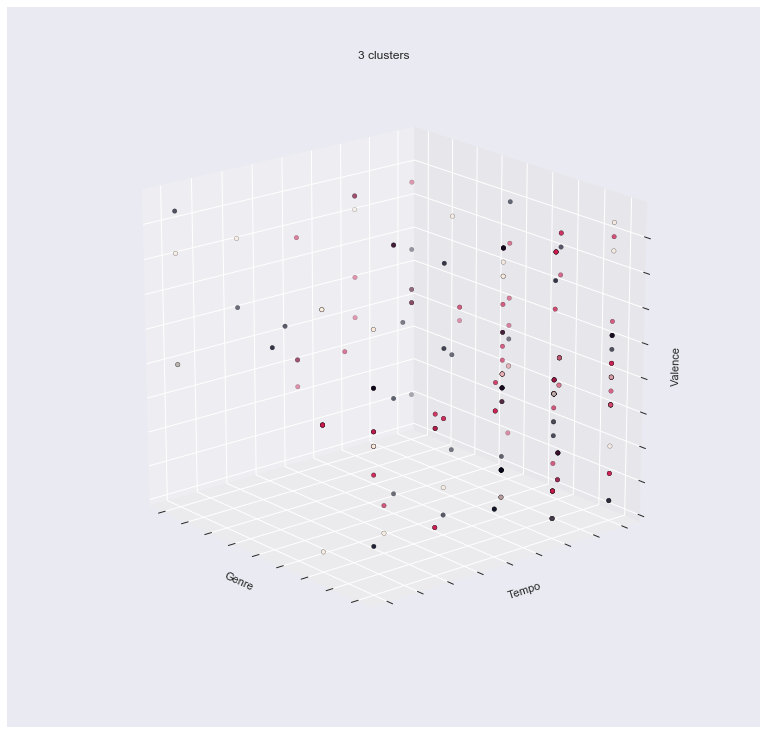

In [12]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
from sklearn.cluster import KMeans as kmeans
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
colors = ['r', 'g', 'b']
iris = datasets.load_iris()
X = Y_lyrics 
estimators = [('k_means_iris_3', KMeans(n_clusters=3))]
fignum = 1
titles = ['3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(11, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=140)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:,1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Genre')
    ax.set_ylabel('Tempo')
    ax.set_zlabel('Valence')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
plt.show()


In [14]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

#analyzing the clusters
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'crossover thrash', 
               12:'metal',13:'k-pop',14:'ska',15:'rock steady',16:'alternative',17:'folk',18:'punk rock', 
               19:'mashup',20:'country',21:'underground rap'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
                 
sp = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
cluster1 =  ClusterIndicesNumpy(0,labels)
cluster2 =  ClusterIndicesNumpy(1,labels)
cluster3 =  ClusterIndicesNumpy(2,labels)
view = []
print(str(len(cluster1)) + " here")
for i in cluster1:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df = pd.DataFrame(data=view,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Tempo','Loudness','Energy','Valence','Mode','Danceability'])
#print(df)
df.to_csv('cluster1.csv')
print(len(cluster2))
view2 = []
for i in cluster2:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view2.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)
df1 = pd.DataFrame(data=view2,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Tempo','Loudness','Energy','Valence','Mode','Danceability'])
print(df1)
df1.to_csv('cluster2.csv')
print(len(cluster3))
view3 = []
for i in cluster3:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view3.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df2 = pd.DataFrame(data=view3,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Tempo','Loudness','Energy','Valence','Mode','Danceability'])
print(df2)
df2.to_csv('cluster3.csv')

75 here
95
                 Artist                     Song Title              Genre  \
0        Antonio Flores                  Isla de Palma             ballad   
1             Badfinger                        Come On               rock   
2             Badfinger                         Dennis               rock   
3             Badfinger                  Just A Chance               rock   
4             Badfinger                 Know One Knows               rock   
5             Badfinger               Three Time Loser               rock   
6        Billie Holiday                  Gloomy Sunday              blues   
7         Chris Cornell            Before We Disappear  alternative metal   
8         Chris Cornell                   Higher Truth  alternative metal   
9         Chris Cornell           Let Your Eyes Wander  alternative metal   
10        Chris Cornell  Nearly Forgot My Broken Heart  alternative metal   
11        Chris Cornell       Our Time In The Universe  alternati

AttributeError: type object 'KMeans' has no attribute 'cluster_centers_'

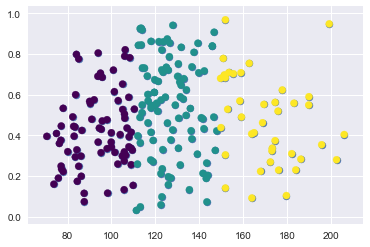

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
X = Y_lyrics
plt.scatter(X[:,3], X[:, 8], s=50);

plt.scatter(X[:, 3], X[:, 8], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 8], c='black', s=200, alpha=0.5);

In [18]:
#clustering with 3d visuas
import numpy as np
import pandas as pd

import csv
indexes = []
import operator
lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Tempo","Loudness","Energy","Danceability","Mode","Valence"]].as_matrix()
X_lyrics    

array([[ 0.297842,  0.643527,  0.023434,  0.001863,  0.058054],
       [ 0.403503,  0.377848,  0.154008,  0.15808 ,  0.011867],
       [ 0.428785,  0.416169,  0.064478,  0.023707,  0.171035],
       ..., 
       [ 0.571947,  0.539841,  0.057515,  0.135417,  0.43496 ],
       [ 0.423553,  0.447584,  0.174226,  0.010201,  0.028618],
       [ 0.155213,  0.362808,  0.061548,  0.083438,  0.47066 ]])

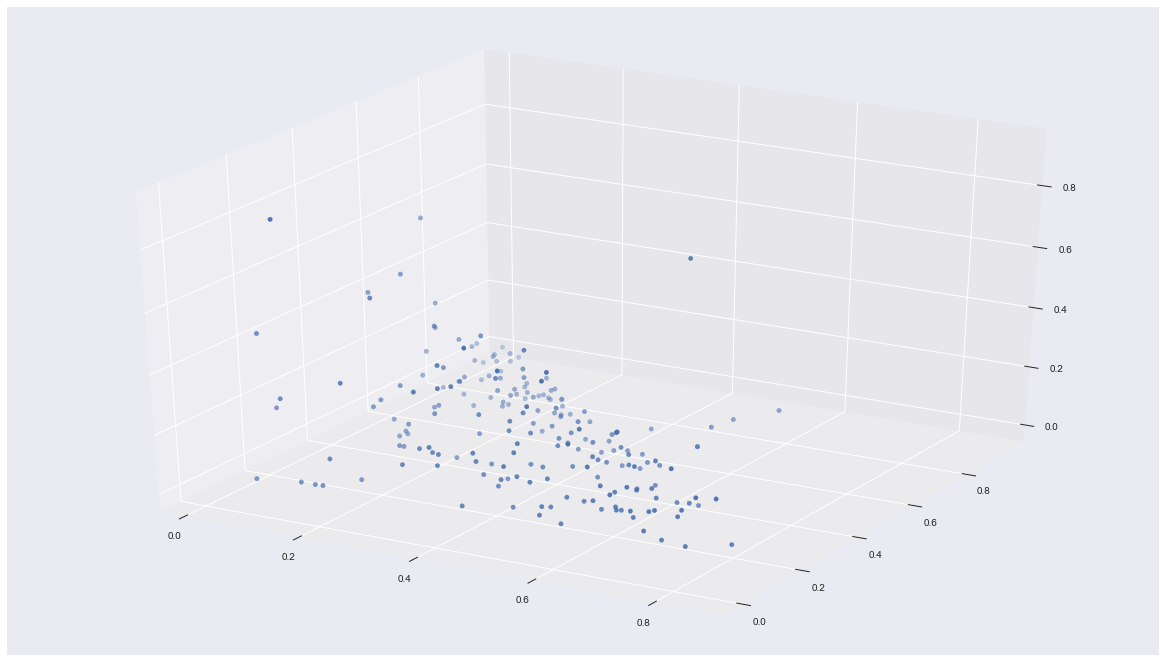

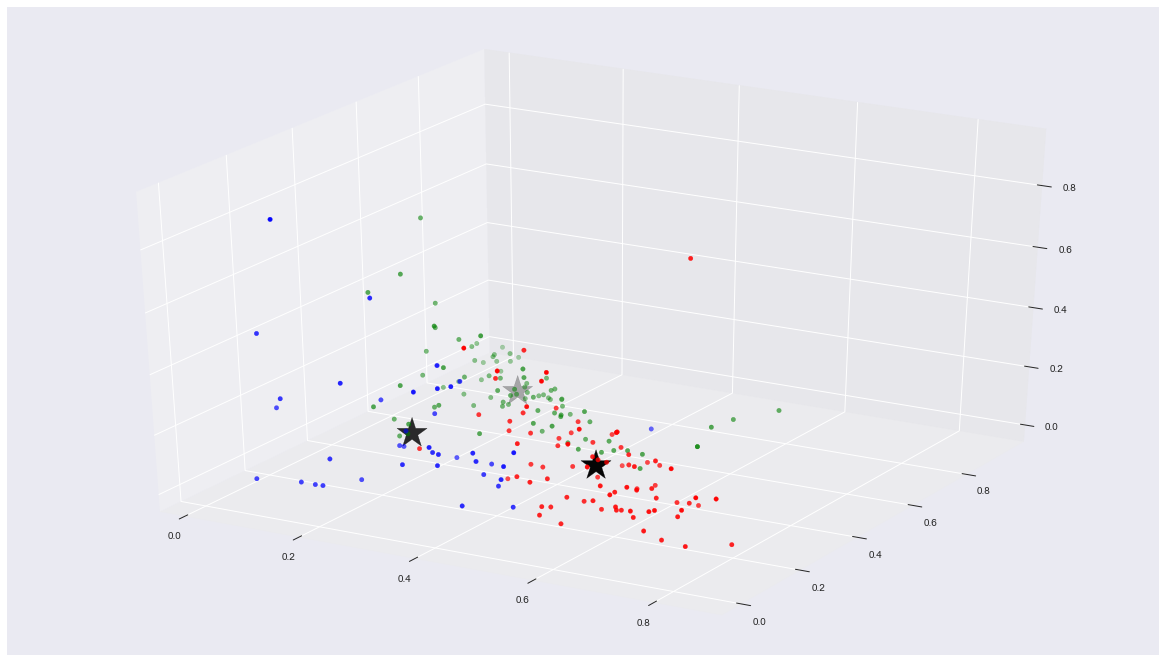

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

plt.rcParams['figure.figsize'] = (16, 9)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# Creating a sample dataset with 4 clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_lyrics[:, 0], X_lyrics[:, 1], X_lyrics[:,2])

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X_lyrics)
# Predicting the clusters
labels = kmeans.predict(X_lyrics)
# Getting the cluster centers

C = kmeans.cluster_centers_
labels_ = []
for i in labels:
    labels_.append(colors[i])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_lyrics[:, 0], X_lyrics[:, 1], X_lyrics[:,2], c=labels_)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
plt.show()
arr_ = ClusterIndicesNumpy(0, labels)

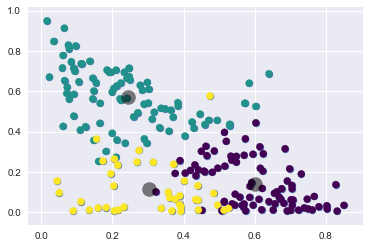

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
X = X_lyrics
plt.scatter(X[:,0], X[:, 1], s=50);
plt.scatter(X[:, 0], X[:,1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [22]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

#analyzing the clusters
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'crossover thrash', 
               12:'metal',13:'k-pop',14:'ska',15:'rock steady',16:'alternative',17:'folk',18:'punk rock', 
               19:'mashup',20:'country',21:'underground rap'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
                 
sp = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
cluster1_ =  ClusterIndicesNumpy(0,labels)
cluster2_ =  ClusterIndicesNumpy(1,labels)
cluster3_ =  ClusterIndicesNumpy(2,labels)
view = []
print(str(len(cluster1_)) + " here")
for i in cluster1_:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df = pd.DataFrame(data=view,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Tempo","Loudness","Energy","Danceability","Mode","Valence"])
#print(df)
df.to_csv('all_cluster1.csv')
print(len(cluster2_))
view2 = []
for i in cluster2_:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view2.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)
df1 = pd.DataFrame(data=view2,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Tempo','Loudness','Energy','Valence','Mode','Danceability'])
print(df1)
df1.to_csv('all_cluster2.csv')
print(len(cluster3_))
view3 = []
for i in cluster3_:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view3.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],tempo,loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df2 = pd.DataFrame(data=view3,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Tempo','Loudness','Energy','Valence','Mode','Danceability'])
print(df2)
df2.to_csv('all_cluster3.csv')

82 here
89
                 Artist                                  Song Title  \
0          Albert Ayler  Music is the Healing force of the Universe   
1        Antonio Flores                               Isla de Palma   
2             Badfinger                                     Come On   
3             Badfinger                                      Dennis   
4             Badfinger                          Too Hung Up On You   
5         Chris Cornell                         Before We Disappear   
6         Chris Cornell                            Bend In The Road   
7         Chris Cornell                        Let Your Eyes Wander   
8         Chris Cornell                                Misery Chain   
9         Chris Cornell                            Only These Words   
10        Chris Cornell                    Our Time In The Universe   
11        Chris Cornell                                Worried Moon   
12          Del Shannon                                     Runawa